# About this notebook

This notebook is based on Coursera's course "Machine learning" by Prof. Andrew Ng from Stanford University. In this course, all codes are written in Octave or Matlab. This notebook provides the Python version of the codes.

This notebook is based on the Exerxise 2. Key words are as follows:
- Logistic regression
- Regularized logistic regression
- Feature mapping

# Logistic regression

In this part, you will build a logistic regression model to predict whether a student gets admitted into a university. 

## Preparation of data

The prediction whether students are allowed to enroll into a universition is based on their results of two exams. As a training dataset for logistic regression, historical data from previous applicantas are given in the file "<strong>ex2data1.txt</strong>." For each training example, the scores of two exams and the admissions decision (0 or 1) are given. The number of the training sample is m.

Let us prepare training dataset. In the file "ex2data1.txt," there are three columns. Data in this file are obtained as the matrix "dat." The first and second columns are scores of the first and second exams, respectively. The third column represents for the results. The numbers 0 and 1 in the third column of the matrix "dat" represent the negative and positive results, respectively. In the data preparation process, the following matrices and vector are obtained:

$$
    \mathbf{dat} =
        \left[\begin{array}{c}
            x_1^{(1)} & x_2^{(1)} & y^{(1)}\\
            x_1^{(2)} & x_2^{(2)} & y^{(2)}\\
            \vdots & \vdots \\            
            x_1^{(m)} & x_2^{(m)} & y^{(m)}\\
        \end{array}\right] \quad
    \boldsymbol{X_0} =
        \left[\begin{array}{c}
            x_1^{(1)}& x_2^{(1)} \\
            x_1^{(2)}& x_2^{(2)} \\
            \vdots \\            
            x_1^{(m)} & x_2^{(m)}\\
        \end{array}\right] \quad
    \boldsymbol{y} =
        \left[\begin{array}{c}
            y^{(1)} \\
            y^{(2)} \\
            \vdots \\            
            y^{(m)} \\
        \end{array}\right] \quad
$$

A new column consisting of 1 is added to the first column of the matrix X<sub>0</sub> to form a new matrix X.

$$
    \boldsymbol{X} =
        \left[\begin{array}{c}
            x_0^{(1)} & x_1^{(1)} & x_2^{(1)} \\
            x_0^{(2)} & x_1^{(2)} & x_2^{(2)}\\
            \vdots & \vdots & \vdots \\            
            x_0^{(m)} & x_1^{(m)} & x_2^{(m)} \\
        \end{array}\right]
        =
                \left[\begin{array}{c}
            1 & x_1^{(1)} & x_2^{(1)}\\
            1 & x_1^{(2)} & x_2^{(2)}\\
            \vdots & \vdots \\            
            1 & x_1^{(m)} & x_2^{(m)}\\
        \end{array}\right]\quad
$$

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

path=os.getcwd()
datpath=path + '/ex2data1.txt'

dat = np.loadtxt(datpath) #Get data

#number of features (including theta0=1) 
n=dat.shape[1] 

#number of datasets  
m=dat.shape[0]

X0 , y =  np.split(dat, [n-1], 1) #Seperate data into the variable matrix X0 and vector y.
X=np.insert(X0, 0, 1, axis=1) # Add 1 to the first column of the matrix X0.

print('the number of datasets is m = %d'%m)
print('the size of the data is (m x n) = (%d x %d)'%(m,n)) 

the number of datasets is m = 100
the size of the data is (m x n) = (100 x 3)


## Visualization of training data

A scatter plot of our training data will be shown.

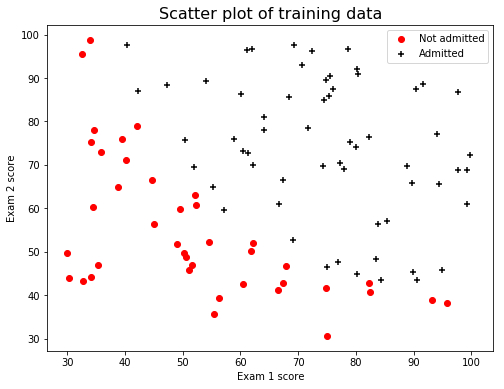

In [2]:
i_neg=0
i_pos=0

pos=y.nonzero()[0][:] #Find non-zero values for y

X_neg=np.zeros((m-pos.shape[0],2)) # data with y = 0
X_pos=np.zeros((pos.shape[0],2)) # data with y = 1

for j in range(m):
    if y[j]==0: #neg (not admitted)
        X_neg[i_neg][0]=X0[j,0]
        X_neg[i_neg][1]=X0[j,1]
        i_neg=i_neg+1
    elif y[j]==1:
        X_pos[i_pos][0]=X0[j,0]
        X_pos[i_pos][1]=X0[j,1]
        i_pos=i_pos+1       

plt.figure(figsize=(8,6))
plt.title("Scatter plot of training data",fontsize=16)
plt.scatter(X_neg[:,0],X_neg[:,1],marker='o',color='red',label='Not admitted') #Not admitted
plt.scatter(X_pos[:,0],X_pos[:,1],marker='+',color ='black',label='Admitted') #Admitted
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()                                                                                
plt.show()

## Cost function

The function "<strong>Hypothesis(Xf,theta_f)</strong>" is the hypothesis *h<sub>&theta;</sub>* (*x*) for a logistic regression model. In this code, this function is treated as a (m x 1)-vector.

$$
    \mathrm{Hypothesis}(X_f,\theta_f) = g\bigl([\theta_f^{T} X_f^{T}]^{T}\bigl),
$$

where the parameters &theta;<sub>f</sub> (n x 1 vector) are written by
$$
    \boldsymbol{\theta_f} =
        \left[\begin{array}{c}
            \theta_0 \\
            \theta_1 \\
            \vdots \\            
            \theta_n \\
        \end{array}\right] \quad
$$
and function g is the sigmoid function. The sigmoid function is defined as
$$
        g(z)=\frac{1}{1+e^{-z}}.
$$
In this case, the hypothesis h takes values between 0 and 1.

The function "<strong>CostFunctionJ</strong>" returns the cost for specific input of theta parameters. The cost function in logistic regression is
$$
    J=\frac{1}{m}\sum_{i=1}^{m}\biggl(-y^{(i)}log\bigl(h_\theta(x^{(i)})\bigl)-(1-y^{(i)})log\bigl(1-h_\theta(x^{(i)})\bigl)\biggl).
$$

The function "<strong>Gradient</strong>" returns the gradient of the cost and is calculated by
$$
    \frac{{\partial}J(\theta)}{{\partial}\theta_j}=\frac{1}{m}\sum_{i=1}^{m}\bigl(h_\theta(x^{(i)})-y^{(i)})\bigl)x^{(i)}_j.
$$

The sigmoid function, hypothesis, cost function, and gradient are defined here:

In [3]:
# sigmoid function
def sigmoid(z_f):
    import math
    return 1/(1+math.e**(-z_f))

# Hypothesis function.
# This function returns m x 1 vector
def Hypothesis(Xf,theta_f):
    mf=Xf.shape[0]    
    return sigmoid(np.reshape((np.matmul(Xf,theta_f)),(mf,1))) # m x 1 vector

def CostFunctionJ(theta_f,Xf,yf): 
    mf=Xf.shape[0]    
    term1=-np.dot(yf.T,np.log(Hypothesis(Xf,theta_f)))
    term2=-np.dot((1-yf).T,np.log(1-Hypothesis(Xf,theta_f)))
    return (1/mf) * ( term1 + term2) 

def Gradient(Xf,yf,theta_f): 
# returns n x 1 vector
    mf=Xf.shape[0]
    temp=Hypothesis(Xf,theta_f)-y
    return 1/mf * np.dot(temp.T, X).T

The sigmoid function will be shown below as a reference

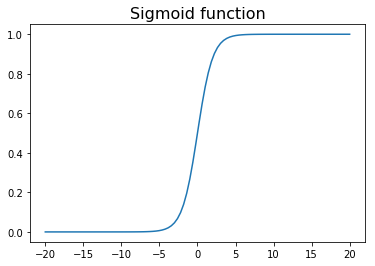

In [4]:
x_sig = np.linspace(-20,20,100)
plt.figure(figsize=(6,4))
plt.title("Sigmoid function",fontsize=16)
plt.plot(x_sig,sigmoid(x_sig))
plt.show()

Based on the defined functions, the cost will be calculated using different values for theta.

In [5]:
theta_test=np.reshape(np.zeros(3),(3,1))

grad_test=Gradient(X,y,theta_test)

print('Calculated cost for theta=(%0.1f,%0.1f,%0.1f): J=%0.3f'%(theta_test[0],theta_test[1],theta_test[2],CostFunctionJ(theta_test,X,y)))
print('Expected cost: J = 0.693')
print('Gradient at initial theta (zeros): %0.4f, %0.4f, %0.4f'%(grad_test[0],grad_test[1],grad_test[2]))
print('Expected gradients: -0.1000, -12.0092, -11.2628')

print('-------------------------------------------------------------------')
theta_test=np.array([[-24],[0.2],[0.2]])
grad_test=Gradient(X,y,theta_test)
print('Calculated cost for theta=(%0.1f,%0.1f,%0.1f): J=%0.3f'%(theta_test[0],theta_test[1],theta_test[2],CostFunctionJ(theta_test,X,y)))
print('Expected cost: J = 0.218')
print('Gradient at initial theta (zeros): %0.3f, %0.3f, %0.3f'%(grad_test[0],grad_test[1],grad_test[2]))
print('Expected gradients: 0.043, 2.566, 2.647')

Calculated cost for theta=(0.0,0.0,0.0): J=0.693
Expected cost: J = 0.693
Gradient at initial theta (zeros): -0.1000, -12.0092, -11.2628
Expected gradients: -0.1000, -12.0092, -11.2628
-------------------------------------------------------------------
Calculated cost for theta=(-24.0,0.2,0.2): J=0.218
Expected cost: J = 0.218
Gradient at initial theta (zeros): 0.043, 2.566, 2.647
Expected gradients: 0.043, 2.566, 2.647


Next, the minimum of the cost function is explored by changing the parameters theta. Nelder-Mead simplex algorithm is used to find the minimum of function. This method is available as "scipy.optimize.fmin." This algorithm only uses function values, not derivatives or second derivatives. Details can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html).

In [6]:
from scipy import optimize

theta=np.reshape(np.zeros(3),(3,1)) #initialization
num_iter=400

def optimizeTheta(theta_f,Xf,yf,num_iter_f):
    result = optimize.fmin(CostFunctionJ, x0=theta_f, args=(Xf, yf), maxiter=num_iter_f, full_output=True)
    return result[0], result[1]

opttheta, fin_cost = optimizeTheta(theta,X,y,num_iter)

print('Optimized theta = (%0.3f, %0.3f, %0.3f)'%(opttheta[0],opttheta[1],opttheta[2]))
print('Expected theta = (-25.161, 0.206, 0.201)')

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
Optimized theta = (-25.161, 0.206, 0.201)
Expected theta = (-25.161, 0.206, 0.201)


Let us prefict y=1 if the hypothesis h is larger than 0. Based on this, we can draw a decision boundary because we already determined the optimised thetas.

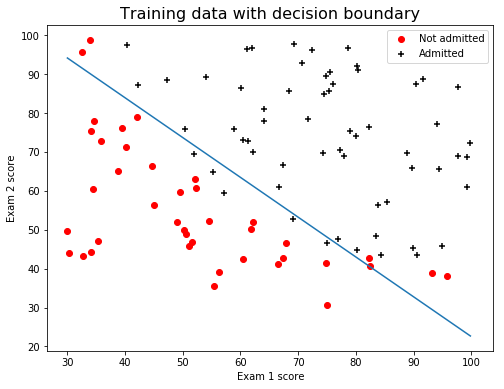

In [7]:
x1=np.linspace(min(X[:,1]),max(X[:,1]),100)

plt.figure(figsize=(8,6))
plt.title("Training data with decision boundary",fontsize=16)
plt.scatter(X_neg[:,0],X_neg[:,1],marker='o',color='red',label='Not admitted') #Not admitted
plt.scatter(X_pos[:,0],X_pos[:,1],marker='+',color ='black',label='Admitted') #Admitted
plt.plot(x1,(-opttheta[0]-opttheta[1]*x1)/opttheta[2])
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()                                                                                
plt.show()

After getting parameters, you can use them to predict the outcomes of unseen data. In the next cell, the probability that a student with score 45 on exam 1 and score 85 on exam 2 will be calculated using the logistic regression model.

In [8]:
X_test=np.reshape(np.array([1,45,85]),(1,3))

print('For a student with scores 45 and 85, we predict an admission probability of %0.3f'%Hypothesis(X_test,opttheta))

For a student with scores 45 and 85, we predict an admission probability of 0.776


# Regularized logistic regression

In this part of the exercise, regularized logistic regression will be implemented to predict whether microchips from a fabrication plant passes quality assurance.

## Preparation of data

Results for some microchips on two different tests are given in the file "<strong>ex2data2.txt</strong>" as a training dataset for logistic regression. For each training example, the scores of two tests and the result (0 or 1) are given. The number of the training sample is m.

Let us prepare training dataset. In the file "ex2data2.txt," there are three columns. Data in this file are obtained as the matrix "dat." The first and second columns are scores of the first and second tests, respectively. The third column represents for the results. The numbers 0 and 1 in the third column of the matrix "dat" represent the negative and positive results, respectively. In the data preparation process, the following matrices and vector are obtained:

$$
    \mathbf{dat} =
        \left[\begin{array}{c}
            x_1^{(1)} & x_2^{(1)} & y^{(1)}\\
            x_1^{(2)} & x_2^{(2)} & y^{(2)}\\
            \vdots & \vdots \\            
            x_1^{(m)} & x_2^{(m)} & y^{(m)}\\
        \end{array}\right] \quad
    \boldsymbol{X_0} =
        \left[\begin{array}{c}
            x_1^{(1)}& x_2^{(1)} \\
            x_1^{(2)}& x_2^{(2)} \\
            \vdots \\            
            x_1^{(m)} & x_2^{(m)}\\
        \end{array}\right] \quad
    \boldsymbol{y} =
        \left[\begin{array}{c}
            y^{(1)} \\
            y^{(2)} \\
            \vdots \\            
            y^{(m)} \\
        \end{array}\right] \quad
$$

A new column consisting of 1 is added to the first column of the matrix X<sub>0</sub> to form a new matrix X.

$$
    \boldsymbol{X} =
        \left[\begin{array}{c}
            x_0^{(1)} & x_1^{(1)} & x_2^{(1)} \\
            x_0^{(2)} & x_1^{(2)} & x_2^{(2)}\\
            \vdots & \vdots & \vdots \\            
            x_0^{(m)} & x_1^{(m)} & x_2^{(m)} \\
        \end{array}\right]
        =
                \left[\begin{array}{c}
            1 & x_1^{(1)} & x_2^{(1)}\\
            1 & x_1^{(2)} & x_2^{(2)}\\
            \vdots & \vdots \\            
            1 & x_1^{(m)} & x_2^{(m)}\\
        \end{array}\right]\quad
$$

In [9]:
path=os.getcwd()
datpath=path + '/ex2data2.txt'

dat = np.loadtxt(datpath) #Get data

#number of features (including theta0=1) 
n=dat.shape[1] 

#number of datasets  
m=dat.shape[0]

X0 , y =  np.split(dat, [n-1], 1) #Seperate data into the variable matrix X0 and vector y.
X=np.insert(X0, 0, 1, axis=1) # Add 1 to the first column of the matrix X0.

print('the number of datasets is m = %d'%m)
print('the size of the data is (m x n) = (%d x %d)'%(m,n)) 

the number of datasets is m = 118
the size of the data is (m x n) = (118 x 3)


A scatter plot of training data will be shown.

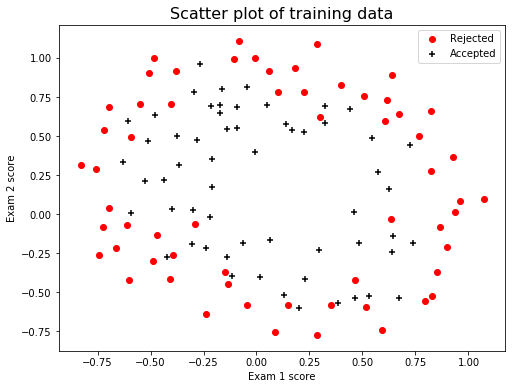

In [10]:
i_neg=0
i_pos=0

pos=y.nonzero()[0][:] #Find non-zero values for y

X_neg=np.zeros((m-pos.shape[0],2)) # data with y = 0
X_pos=np.zeros((pos.shape[0],2)) # data with y = 1

for j in range(m):
    if y[j]==0: #neg (rejected)
        X_neg[i_neg][0]=X0[j,0]
        X_neg[i_neg][1]=X0[j,1]
        i_neg=i_neg+1
    elif y[j]==1:
        X_pos[i_pos][0]=X0[j,0]
        X_pos[i_pos][1]=X0[j,1]
        i_pos=i_pos+1       

plt.figure(figsize=(8,6))
plt.title("Scatter plot of training data",fontsize=16)
plt.scatter(X_neg[:,0],X_neg[:,1],marker='o',color='red',label='Rejected') #Not admitted
plt.scatter(X_pos[:,0],X_pos[:,1],marker='+',color ='black',label='Accepted') #Admitted
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()                                                                                
plt.show()

## Feature mapping

The scatter plot of training data shows that our dataset cannot be separated into positive and negative examples by a straight line. In other words, a linear decision boundary is no longer appropreate for this dataset. One of the possible ways to fit the data better is to create more features from each data point. That can be achieved by mapping features into all polynomial terms of x<sub>1</sub> and x<sub>2</sub> up to the sixth power.

Let us define the function "<strong>mapFeature</strong>" for feature mapping. 

$$
    \mathrm{mapFeature}(X_1,X_2,n_o) =
        \left[\begin{array}{c}
            (x_1^{(1)})^{0}(x_2^{(1)})^{0} & (x_1^{(1)})^{0}(x_2^{(1)})^{1} & (x_1^{(1)})^{0}(x_2^{(1)})^{2} & \dots & (x_1^{(1)})^{i}(x_2^{(1)})^{j}  & \dots & (x_1^{(1)})^{n_o}(x_2^{(1)})^{n_o}  \\
            (x_1^{(2)})^{0}(x_2^{(2)})^{0}  & (x_1^{(2)})^{0}(x_2^{(2)})^{1} & (x_1^{(2)})^{0}(x_2^{(2)})^{2}& \dots & (x_1^{(2)})^{i}(x_2^{(2)})^{j} & \dots & (x_1^{(2)})^{n_o}(x_2^{(2)})^{n_o}\\
            \vdots & \vdots & \vdots \\            
            (x_1^{(m)})^{0}(x_2^{(m)})^{0}  & (x_1^{(m)})^{0}(x_2^{(m)})^{1} & (x_1^{(m)})^{0}(x_2^{(m)})^{2} & \dots & (x_1^{(m)})^{i}(x_2^{(m)})^{j} & \dots & (x_1^{(m)})^{n_o}(x_2^{(m)})^{n_o}\\
        \end{array}\right]
$$
where integers i and j satisfy
$$
0 \leq i, j \leq n_o 
$$
This function returns (m x n<sub>FM</sub>)-matrix, where the integer n<sub>FM</sub> can be calculated by
$$
n_{FM} = \frac{1}{2}(n_o+1)(n_o+2)
$$
and is regarded as the number of new features.
In the present case, the order n<sub>o</sub> is 6.

In [11]:
def mapFeature(X1f,X2f, order):
#X1f and X2f are (mf x 1)-vector. 
    num_feature=int(0.5*(order+1)*(order+2))
    mf=X1f.shape[0] #=X2f.shape[0]
    ret = np.ones([mf,1])
        
    num_f=0
    
    for i in range(order+1):
        for j in range(order-i+1):         
            if (i==0) and (j==0):
                 num_f=num_f+1        
            else:
                ret=np.insert(ret, num_f, ((X1f**i) * (X2f**j)).T, axis=1)            
                num_f=num_f+1        

    return ret

The feature mapping will be performed in the next cell. We will map the features into all polynomial terms of x<sub>1</sub> and x<sub>2</sub> up to the sixth power (order = 6). 

In [12]:
X1=X[:,1]
X2=X[:,2]
order = 6

X_fm= mapFeature(X1,X2,order)

nf=X_fm.shape[1]

print("At first, there are %d features (including x0 = 1) in the original data."%n)
print("After performing the feature mapping considering up to %d-th power, the number of features is %d."%(order,nf))

At first, there are 3 features (including x0 = 1) in the original data.
After performing the feature mapping considering up to 6-th power, the number of features is 28.


A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary. 

## Regularized logistic regression

### Cost and gradient for a few different initial conditions

The function "<strong>RegCostFunctionJ</strong>" returns the cost for specific input of theta parameters. The regularized cost function for logistic regression is given by
$$
    J=\frac{1}{m}\sum_{i=1}^{m}\biggl(-y^{(i)}log\bigl(h_\theta(x^{(i)})\bigl)-(1-y^{(i)})log\bigl(1-h_\theta(x^{(i)})\bigl)\biggl)+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta^2_j.
$$
It should be noted that the parameter &theta;<sub>0</sub> should not be regularized. In the equation above, the second summation is taken from j = 1 (not j = 0) to j = n.

The function "<strong>RegGradient</strong>" returns the gradient of the cost function that is a vector where the j-th element is defined as

$$
    \frac{{\partial}J(\theta)}{{\partial}\theta_j}=\frac{1}{m}\sum_{i=1}^{m}\bigl(h_\theta(x^{(i)})-y^{(i)})\bigl)x^{(i)}_j \ \ \ \ \ \ \ (\mathrm{for } j = 0) 
$$

and 

$$
    \frac{{\partial}J(\theta)}{{\partial}\theta_j}=\frac{1}{m}\sum_{i=1}^{m}\bigl(h_\theta(x^{(i)})-y^{(i)})\bigl)x^{(i)}_j + \frac{\lambda}{m}\theta_j \ \ \ \ \ \ \ (\mathrm{for } j \geq 1) 
$$


In [13]:
def RegCostFunctionJ(theta_f,Xf,yf, lambda_f): 
    mf=Xf.shape[0]
    term1=-np.dot(yf.T,np.log(Hypothesis(Xf,theta_f)))
    term2=-np.dot((1-yf).T,np.log(1-Hypothesis(Xf,theta_f)))
    reg = 0.5 * lambda_f/mf *( np.dot(theta_f.T,theta_f)-theta_f[0]*theta_f[0])
    return (1/mf) * ( term1 + term2) +reg

def RegGradient(Xf,yf,theta_f,lambda_f): 
# returns n x 1 vector
    mf=Xf.shape[0]
    temp=Hypothesis(Xf,theta_f)-yf
    
    temp2= np.zeros((theta_f.shape[0],1))
    temp2[0]=lambda_f/mf *theta_f[0]
    
    reg=lambda_f/mf * theta_f - temp2
    return 1/mf * np.dot(temp.T, Xf).T + reg

Let us calculate the cost and gradient for a few sets of initial theta values and lambdas. At first, all components of theta are set to be 0, and the le &lambda; is set to be 1:

$$
    \boldsymbol{\theta_{test}} =
        \left[\begin{array}{c}
            0 \\
            0 \\
            \vdots \\            
            0 \\
        \end{array}\right] \quad
$$

and

$$
    \lambda_{test} = 1.
$$

In [18]:
theta_test=np.reshape(np.zeros(nf),(nf,1))
lambda_test=1

grad_test=RegGradient(X_fm, y, theta_test, lambda_test)

print('lambda=%0.1f'%lambda_test)
print('Calculated cost for theta=(%0.1f,%0.1f,%0.1f): J=%0.3f'%(theta_test[0],theta_test[1],theta_test[2],RegCostFunctionJ(theta_test,X_fm,y,lambda_test)))
print('Expected cost: J = 0.693')
print('Some of the gradient components at initial theta (zeros): %0.4f, %0.4f, %0.4f, %0.4f, %0.4f'%(grad_test[0],grad_test[7],grad_test[1],grad_test[13],grad_test[8]))
print('Expected gradients: 0.0085, 0.0188, 0.0001, 0.0503, 0.0115')

lambda=1.0
Calculated cost for theta=(0.0,0.0,0.0): J=0.693
Expected cost: J = 0.693
Some of the gradient components at initial theta (zeros): 0.0085, 0.0188, 0.0001, 0.0503, 0.0115
Expected gradients: 0.0085, 0.0188, 0.0001, 0.0503, 0.0115


Next, different initial conditions shown below are adopted:

$$
    \boldsymbol{\theta_{test}} =
        \left[\begin{array}{c}
            1 \\
            1 \\
            \vdots \\            
            1 \\
        \end{array}\right] \quad
$$

and

$$
    \lambda_{test} = 10.
$$

In [19]:
theta_test=np.reshape(np.ones(nf),(nf,1))
lambda_test=10

grad_test=RegGradient(X_fm, y, theta_test, lambda_test)

print('lambda=%0.1f'%lambda_test)
print('Calculated cost for theta=(%0.1f,%0.1f,%0.1f): J=%0.2f'%(theta_test[0],theta_test[1],theta_test[2],RegCostFunctionJ(theta_test,X_fm,y,lambda_test)))
print('Expected cost: J = 3.16')
print('Some of the gradient components at initial theta (ones): %0.4f, %0.4f, %0.4f, %0.4f, %0.4f'%(grad_test[0],grad_test[7],grad_test[1],grad_test[13],grad_test[8]))
print('Expected gradients: 0.3460, 0.1614, 0.1948, 0.2269, 0.0922')

lambda=10.0
Calculated cost for theta=(1.0,1.0,1.0): J=3.16
Expected cost: J = 3.16
Some of the gradient components at initial theta (ones): 0.3460, 0.1614, 0.1948, 0.2269, 0.0922
Expected gradients: 0.3460, 0.1614, 0.1948, 0.2269, 0.0922


### Decision boundary

The regularized cost function J will be minimized by changing the parameters &theta;. New functions for minimizing the cost function and for drawing decision boundary with original data are defined in the next cell. 

The minimization of the cost function can be done using [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) in the function "<strong>RegOptimizeTheta</strong>." Some algorithms are available. In this notebook, [BFGS algorythm](https://en.wikipedia.org/wiki/Broyden–Fletcher–Goldfarb–Shanno_algorithm) is adopted.

The function "<strong>DecisionBoundary</strong>" is used to draw a decision boundary. The boundary is shown using the optimized &theta;.

The function "<strong>predict</strong>" returns 0/1 if the input value is smaller/larger than 0.5. 

In [20]:
def RegOptimizeTheta(theta_f,Xf,yf,lambda_f):
    from scipy import optimize
    result = optimize.minimize(RegCostFunctionJ, x0=theta_f, args=(Xf, yf,lambda_f),method='BFGS', options={"maxiter":5000, "disp":False})
    return result

def DecisionBoundary(Xneg_f, Xpos_f,opttheta_f):
    #this function is used to draw a decision boundary.
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))

    for i in range(len(xvals)):
        for j in range(len(yvals)):
            F_ij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]),6)
            zvals[i][j] = np.dot(F_ij,opttheta_f)

    zvals = zvals.transpose()

    contour = plt.contour( xvals, yvals, zvals, [0])
    plt.scatter(Xneg_f[:,0],Xneg_f[:,1],marker='o',color='red',label='Rejected') #Not admitted
    plt.scatter(Xpos_f[:,0],Xpos_f[:,1],marker='+',color ='black',label='Accepted') #Admitted
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()                                   

def predict(x_inp):
    #If the hypothesis is larger than 0.5, this function returns 1.
    mf=x_inp.shape[0]
    ret=np.reshape(np.zeros(mf),(mf,1))
    
    for j in range(mf):
        if  x_inp[j] < 0.5:
            ret[j]=0
        else:
            ret[j]=1
    return ret

Decision boundaries will be shown for different parameters of &lambda; (&lambda; = 0, 1, 10, 100).

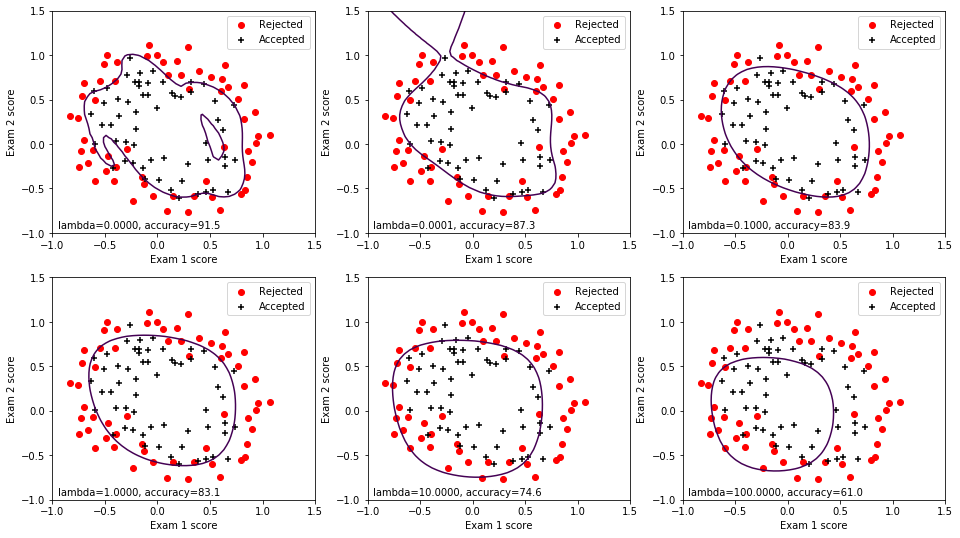

In [21]:
#Initial condition
theta_test=np.reshape(np.zeros(nf),(nf,1))
lambda_set=np.array([0,0.0001,0.1,1,10,100])

plt.figure(figsize=(16,9))

for j in range(lambda_set.shape[0]):
    lambda_test=lambda_set[j]
    result = RegOptimizeTheta(theta_test,X_fm,y,lambda_test)
    opttheta=result.x

    temp="23%d"%(j+1)
    
    plt.subplot(temp)
    DecisionBoundary(X_neg, X_pos,opttheta)
    
    #accuracy
    p=predict(Hypothesis(X_fm,opttheta))
    accuracy=np.count_nonzero(p==y)/m*100
    
    #adding texts
    plt.text(-0.95,-0.95, 'lambda=%0.4f, accuracy=%0.1f'%(lambda_set[j],accuracy))

plt.show()